# Operações Morfológicas

- **Dilatação**: A dilatação é usada para expandir os objetos em uma imagem.

- **Erosão**: A erosão é o inverso da dilatação, usada para reduzir os objetos em uma imagem.

- **Abertura**: A abertura é uma operação que remove o ruído branco de uma imagem, utilizado para remover o ruído externo.

- **Fechamento**: O fechamento é uma operação que remove o ruído preto de uma imagem, utilizado para preencher pequenos buracos.

## Definições Matemáticas

| Operação Morfológica | Definição Matemática | Implementação Discreta (OpenCV) |
|----------|----------|----------|
| Erosão  | $$A \ominus B = \{ z \mid (B_z) \subseteq A \}$$   | $$dst(x, y)=max_{(x', y'):element(x',y') \neq 0} \space src(x + x', y + y')$$   |
| Dilatação  | $$A \oplus B = \{ z \mid (\hat{B})_z \cap A \neq \emptyset \}$$   | $$ dst(x, y) =max_{(x', y'):element(x', y') \neq 0} \space src(x + x', y + y') $$   |
| Abertura  | $$A \circ B = (A \ominus B) \oplus B$$   | Erosão seguida da dilatação   |
| Fechamento  | $$A \bullet B = (A \oplus B) \ominus B$$   |Dilatação seguida da erosão   |

- `dst`: imagem de saída;
- `src`: imagem de entrada.

# Importação dos Módulos

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Carregar as imagens

As imagens são coloridas, então é necessário ler como escala de cinzas e aplicar um `trheshold` para torná-las binárias. Após isso, em alguns casos, ainda é preciso inverter os valores utilizando uma operação `bitwise_not`.

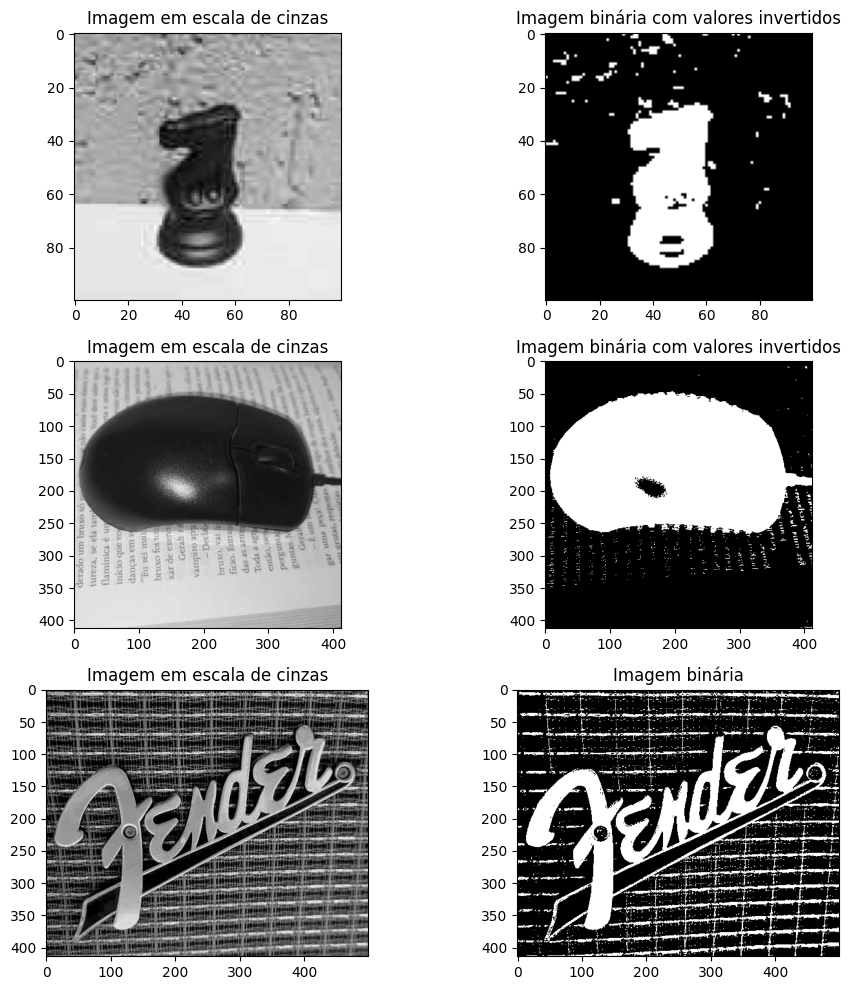

In [ ]:
# Ler as imagems em escala de cinzas
img_knight = cv2.imread('cavalo.jpg', 0)
img_mouse = cv2.imread('mouse.jpg', 0)
img_amp = cv2.imread('ampfender.jpg', 0)

# Converter para imagens binárias usando thresholding
_, img_knight_b = cv2.threshold(img_knight, 128, 255, cv2.THRESH_BINARY)
_, img_mouse_b = cv2.threshold(img_mouse, 128, 255, cv2.THRESH_BINARY)
_, img_amp_b = cv2.threshold(img_amp, 128, 255, cv2.THRESH_BINARY)

# Inverter os valores
img_knight_b = cv2.bitwise_not(img_knight_b)
img_mouse_b = cv2.bitwise_not(img_mouse_b)

# Apresentar o resultado
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
ax = axes.ravel()

# Cavalo
ax[0].imshow(img_knight, cmap='gray')
ax[0].set_title("Imagem em escala de cinzas")

ax[1].imshow(img_knight_b, cmap='gray')
ax[1].set_title("Imagem binária com valores invertidos")

# Mouse
ax[2].imshow(img_mouse, cmap='gray')
ax[2].set_title("Imagem em escala de cinzas")

ax[3].imshow(img_mouse_b, cmap='gray')
ax[3].set_title("Imagem binária com valores invertidos")

# Amplificador
ax[4].imshow(img_amp, cmap='gray')
ax[4].set_title("Imagem em escala de cinzas")

ax[5].imshow(img_amp_b, cmap='gray')
ax[5].set_title("Imagem binária")

fig.tight_layout()
plt.show()

# Definição do kernel de Erosão e Dilatação

Para remover corretamente a grade do amplificador, foi necessário que a imaggem passasse por erosão e dilatação, com diferentes kernels, antes da abertura. O kernel de erosão foi definido como 6x4 para remover com mais intensidade horizontalmente. Na dilatação foi selecionado um kernel de 5x1 para que houvesse uma dilatação apenas horizontal.

In [ ]:
kernel_a0 = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 4))
kernel_a = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))

# Erosão e Dilatação

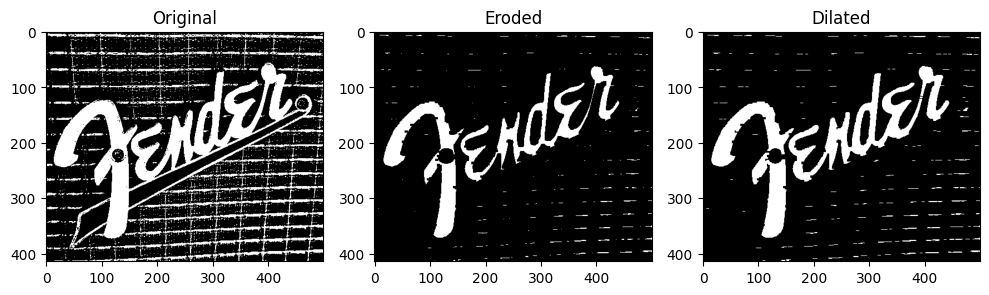

In [ ]:
img_eroded_a = cv2.erode(img_amp_b.copy(), kernel_a0, iterations = 1)
img_dilated_a = cv2.dilate(img_eroded_a.copy(), kernel_a, iterations = 1)

# Apresentar o resultado
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()

# Amplificador
ax[0].imshow(img_amp_b, cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(img_eroded_a, cmap='gray')
ax[1].set_title("Eroded")

ax[2].imshow(img_dilated_a, cmap='gray')
ax[2].set_title("Dilated")

fig.tight_layout()
plt.show()

# Definição do Kernel de abertura

O tamanho do kernel da imagem do cavalo foi definido como 4x3 retangular para que um ruido, na parte superior da imagem, fosse removido.

O tamanho do kernel da imagem do mouse é maior para que seja mais agressivo porque a imagem é maior. O formato 15x5 foi definido para os ruídos com componente horizontal maior fossem removidos mais eficientemente.

In [ ]:
kernel_k = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 3))
kernel_m = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))
kernel_a = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 5))

# Abertura

A operação de abertura remove o ruído branco da imagem.

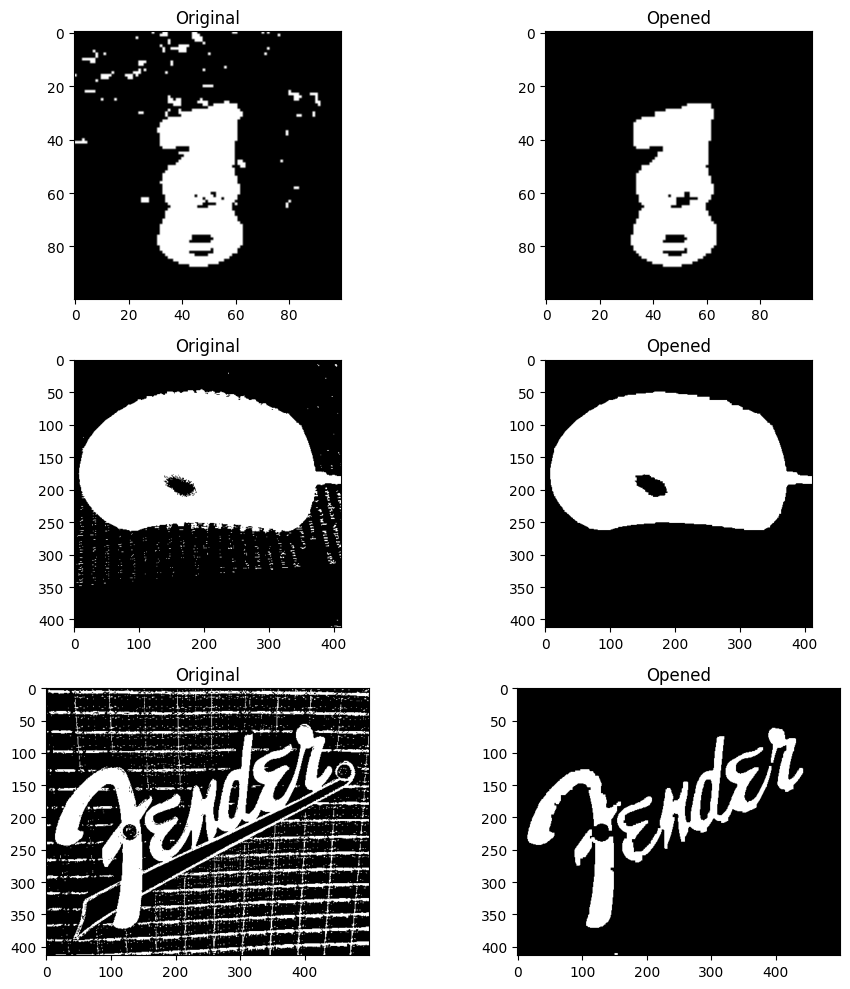

In [ ]:
img_opened_k = cv2.morphologyEx(img_knight_b.copy(), cv2.MORPH_OPEN, kernel_k)
img_opened_m = cv2.morphologyEx(img_mouse_b.copy(), cv2.MORPH_OPEN, kernel_m)
img_opened_a = cv2.morphologyEx(img_dilated_a.copy(), cv2.MORPH_OPEN, kernel_a)


# Apresentar o resultado
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
ax = axes.ravel()

# Cavalo
ax[0].imshow(img_knight_b, cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(img_opened_k, cmap='gray')
ax[1].set_title("Opened")

# Mouse
ax[2].imshow(img_mouse_b, cmap='gray')
ax[2].set_title("Original")

ax[3].imshow(img_opened_m, cmap='gray')
ax[3].set_title("Opened")

# Amplificador
ax[4].imshow(img_amp_b, cmap='gray')
ax[4].set_title("Original")

ax[5].imshow(img_opened_a, cmap='gray')
ax[5].set_title("Opened")

fig.tight_layout()
plt.show()

# Definição do Kernel de Fechamento

O tamanho do kernel do cavalo foi definido com 8 pixels na horizontal foi escolhido para que preserve, o máximo o possível, a silhueta dos lados do cavalo (vertical).

Como a imagem do mouse possui um "buraco" de ruído preto relativamente grande, é necessário um kernel maior. Além disso, o mouse está muito próximo da borda esquerda da imagem, então a componente horizontal da imagem foi definida menor que a vertical. O tamanho do kernel ficou como 16x25

Para a imagem da logo do amplificador, um kernel de 7c8 obteve um bom resultado. Ainda restou algumas falhas, mas assim é o maior kernel que evita que as letras "grudem".

In [ ]:
kernel_k = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 3))
kernel_m = cv2.getStructuringElement(cv2.MORPH_RECT, (16, 25))
kernel_a = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 8))

# Fechamento

A operação de abertura remove o ruído preto da imagem.

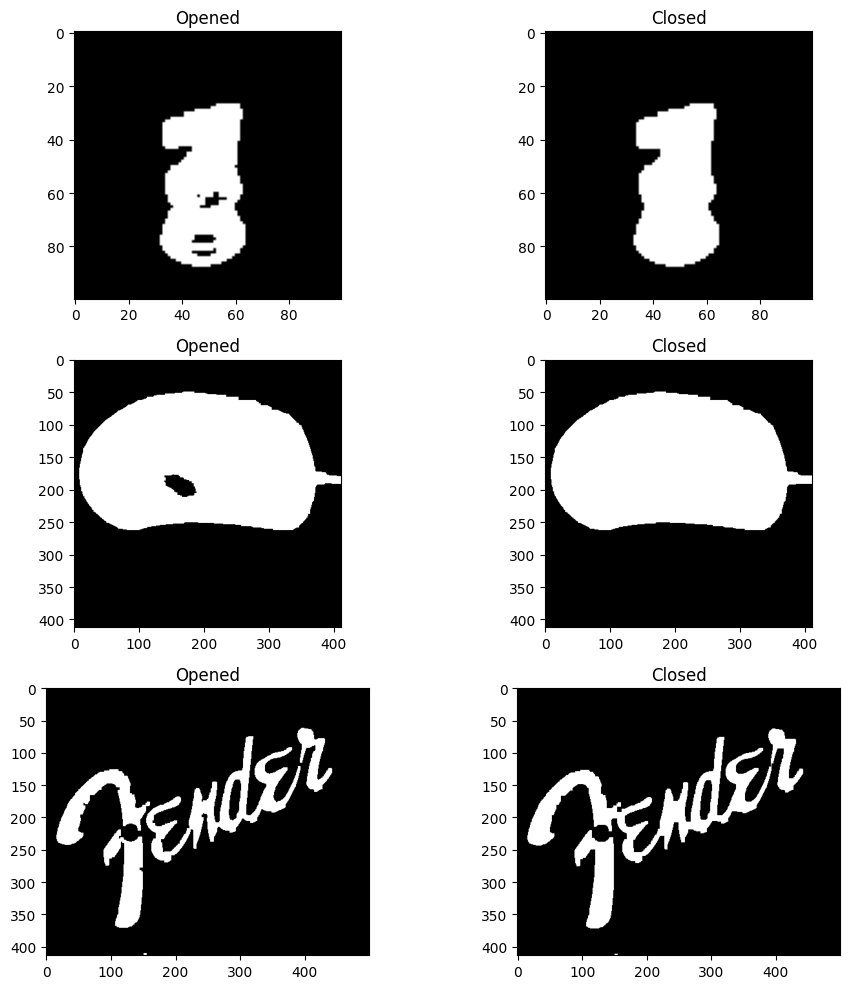

In [ ]:
img_closed_k = cv2.morphologyEx(img_opened_k.copy(), cv2.MORPH_CLOSE, kernel_k)
img_closed_m = cv2.morphologyEx(img_opened_m, cv2.MORPH_CLOSE, kernel_m)
img_closed_a = cv2.morphologyEx(img_opened_a, cv2.MORPH_CLOSE, kernel_a)


# Apresentar o resultado
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
ax = axes.ravel()

# Cavalo
ax[0].imshow(img_opened_k, cmap='gray')
ax[0].set_title("Opened")

ax[1].imshow(img_closed_k, cmap='gray')
ax[1].set_title("Closed")

# Mouse
ax[2].imshow(img_opened_m, cmap='gray')
ax[2].set_title("Opened")

ax[3].imshow(img_closed_m, cmap='gray')
ax[3].set_title("Closed")

# Amplificador
ax[4].imshow(img_opened_a, cmap='gray')
ax[4].set_title("Opened")

ax[5].imshow(img_closed_a, cmap='gray')
ax[5].set_title("Closed")

fig.tight_layout()
plt.show()

# Apresentação dos resultados finais

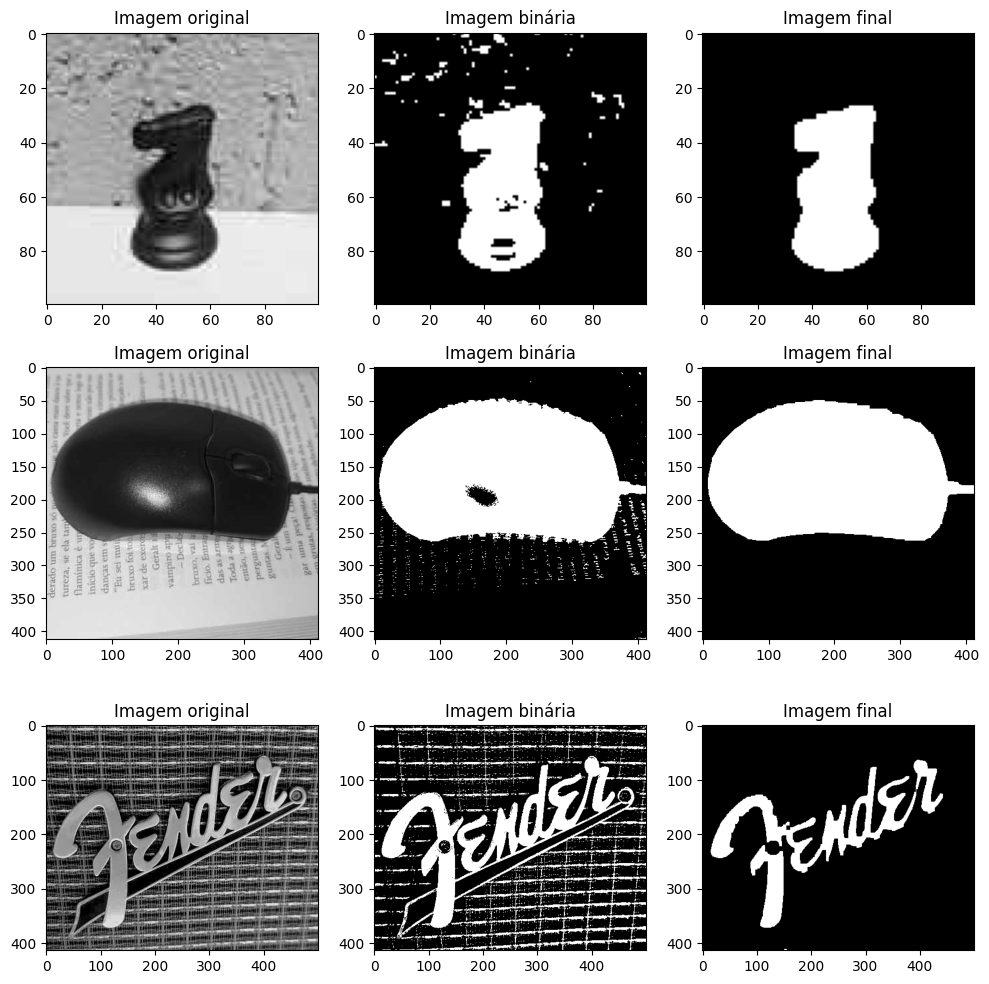

In [ ]:
# Apresentar o resultado
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
ax = axes.ravel()

# Cavalo
ax[0].imshow(img_knight, cmap='gray')
ax[0].set_title("Imagem original")

ax[1].imshow(img_knight_b, cmap='gray')
ax[1].set_title("Imagem binária")

ax[2].imshow(img_closed_k, cmap='gray')
ax[2].set_title("Imagem final")

# Mouse
ax[3].imshow(img_mouse, cmap='gray')
ax[3].set_title("Imagem original")

ax[4].imshow(img_mouse_b, cmap='gray')
ax[4].set_title("Imagem binária")

ax[5].imshow(img_closed_m, cmap='gray')
ax[5].set_title("Imagem final")

# Amplificador
ax[6].imshow(img_amp, cmap='gray')
ax[6].set_title("Imagem original")

ax[7].imshow(img_amp_b, cmap='gray')
ax[7].set_title("Imagem binária")

ax[8].imshow(img_closed_a, cmap='gray')
ax[8].set_title("Imagem final")

fig.tight_layout()
plt.show()